<a href="https://colab.research.google.com/github/ilyasouerdi/Projet-Machine-Learning-/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix



In [12]:
df = pd.read_csv("Brain Tumor.csv")
dataset = df.drop('Image', axis=1)
print(dataset.head())

   Class      Mean     Variance  Standard Deviation   Entropy  Skewness  \
0      0  6.535339   619.587845           24.891522  0.109059  4.276477   
1      0  8.749969   805.957634           28.389393  0.266538  3.718116   
2      1  7.341095  1143.808219           33.820234  0.001467  5.061750   
3      1  5.958145   959.711985           30.979219  0.001477  5.677977   
4      0  7.315231   729.540579           27.010009  0.146761  4.283221   

    Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
0  18.900575   98.613971  0.293314  0.086033     0.530941       4.473346   
1  14.464618   63.858816  0.475051  0.225674     0.651352       3.220072   
2  26.479563   81.867206  0.031917  0.001019     0.268275       5.981800   
3  33.428845  151.229741  0.032024  0.001026     0.243851       7.700919   
4  19.079108  174.988756  0.343849  0.118232     0.501140       6.834689   

   Correlation     Coarseness  
0     0.981939  7.458341e-155  
1     0.988834  7.458341e-15

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9402390438247012
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       400
           1       0.98      0.89      0.93       353

    accuracy                           0.94       753
   macro avg       0.95      0.94      0.94       753
weighted avg       0.94      0.94      0.94       753

Coefficients: [[-1.74931586e-001 -2.80690586e-003  3.79590170e-001 -2.76462510e+000
  -3.63438096e-001  7.09555657e-002 -5.27501633e-003 -5.33078867e+000
  -2.25428267e+000 -4.34516120e+000  3.36573703e-001 -1.82530337e+000
  -1.44629179e-154]]
Intercept: [-1.95451761]


Text(0.5, 427.9555555555555, 'Étiquette prévue')

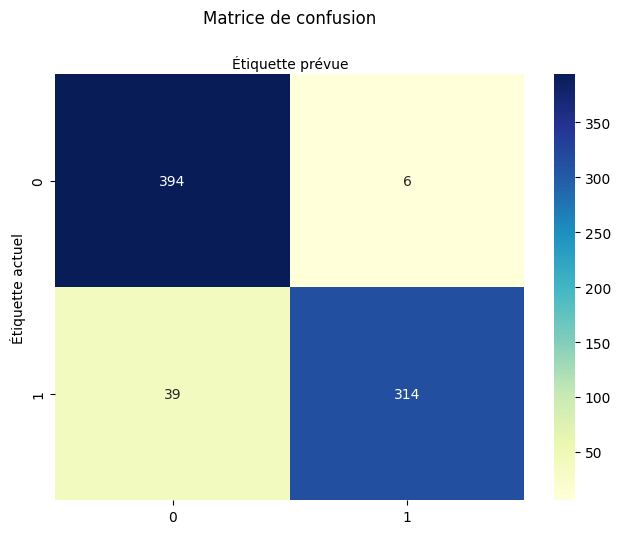

In [13]:

X_train, X_test, y_train, y_test = train_test_split(dataset[dataset.columns.drop('Class')], df.Class, train_size=0.8, random_state=0)
# Créer et entraîner le modèle de Logistic Regression
model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred2))

print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Étiquette actuel')
plt.xlabel('Étiquette prévue')

Scores de validation croisée: [0.98671096 0.99003322 0.98172757 0.9833887  0.98336106]
Moyenne des scores de validation croisée: 0.9850443060016252


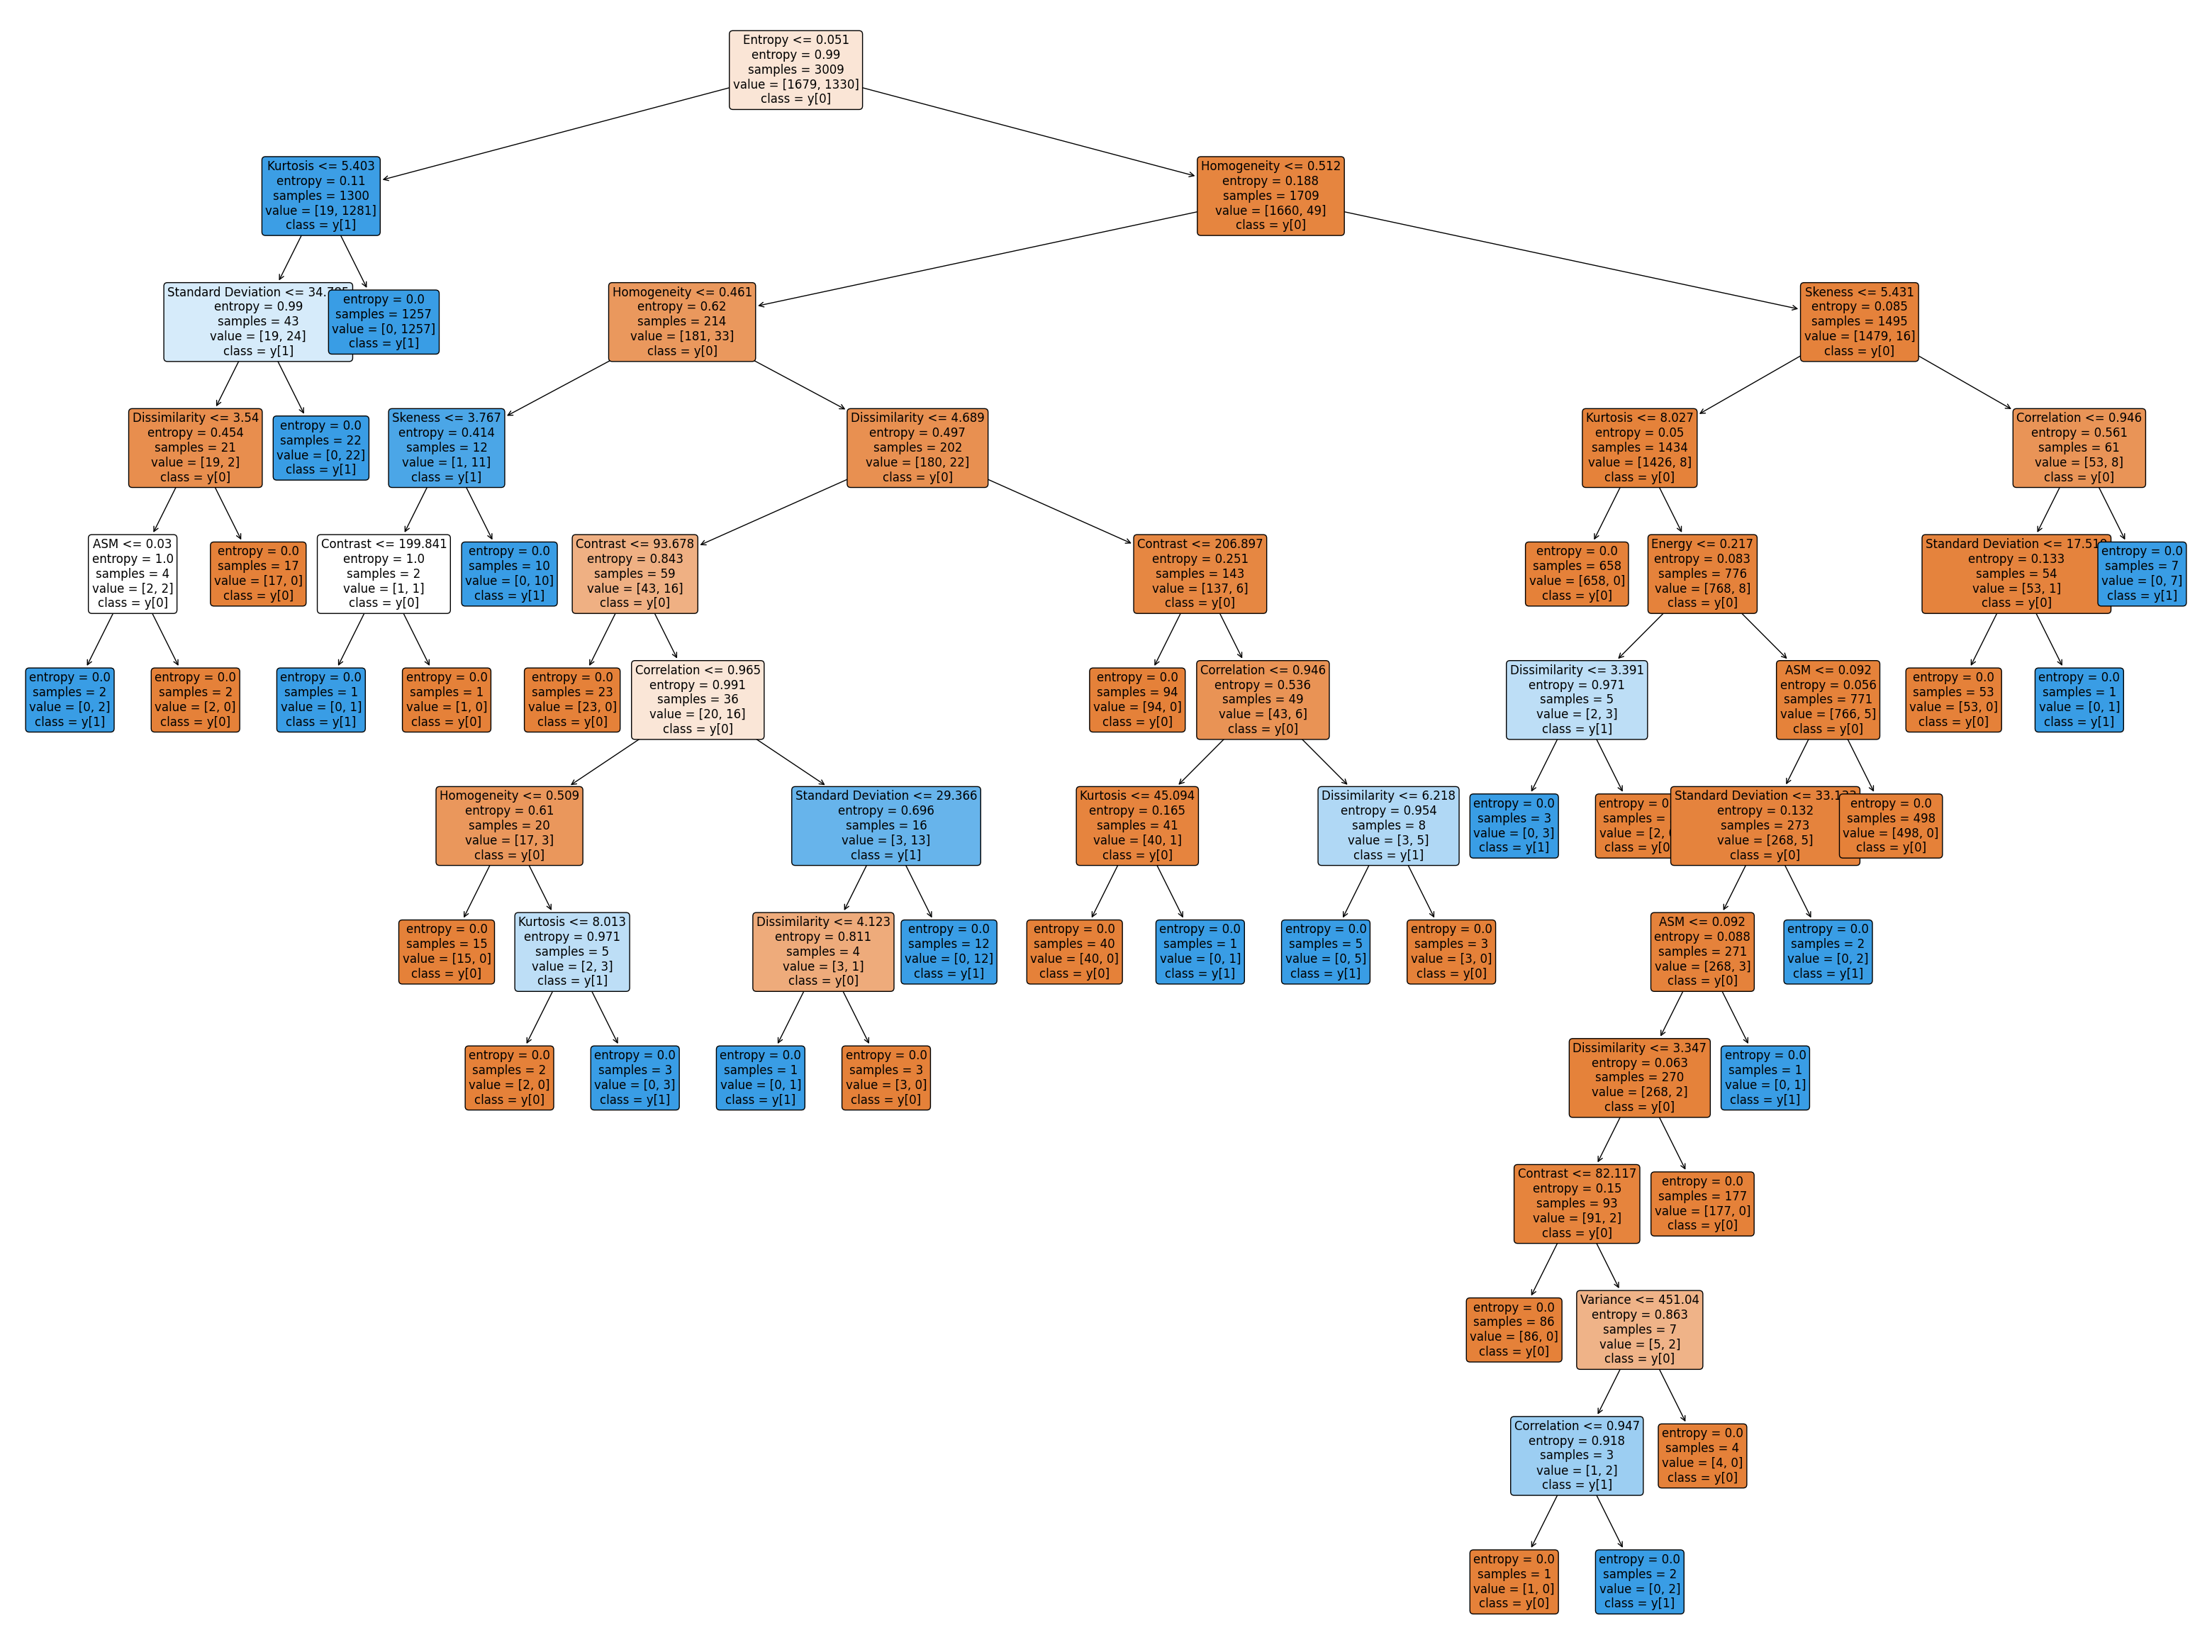

In [8]:


X_train, X_test, y_train, y_test = train_test_split(dataset[dataset.columns.drop('Class')], df.Class, train_size=0.8, random_state=0)

# Créer et entraîner le modèle de Classification
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Scores de validation croisée:", scores)
mean_score = scores.mean()
print("Moyenne des scores de validation croisée:", mean_score)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plt.figure(figsize=(40,30))
tree_plot = plot_tree(clf, filled=True, feature_names=['Mean', 'Variance', 'Standard Deviation', 'Entropy','Skeness','Kurtosis','Contrast','Energy','ASM','Homogeneity','Dissimilarity','Correlation','Coarseness'], class_names=True, rounded=True, fontsize=12)
plt.show()